In [45]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import math

#プロット用です
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# 機械学習用です。
from sklearn.linear_model import LogisticRegression

#sklearn.cross_validationだとエラーになる
from sklearn.model_selection import train_test_split

#！これだとエラーが出る
# from sklearn.cross_validation import train_test_split

#正しくはこちら
from sklearn.model_selection import cross_val_score

# もう一つ、性能の評価用に
from sklearn import metrics

# エラーが出たら、セットアップをお願いします。
import statsmodels.api as sm

In [3]:
def logistic(t):
    return 1.0/(1+math.exp(-1.0*t))

In [4]:
t = np.linspace(-6,6,500)
y = np.array([logistic(ele) for ele in t])

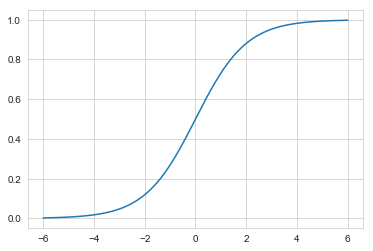

In [5]:
plt.plot(t,y)

In [6]:
df = sm.datasets.fair.load_pandas().data

In [7]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [9]:
def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0

In [10]:
df["Had_Affair"] = df["affairs"].apply(affair_check)

In [11]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [12]:
df.groupby("Had_Affair").mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


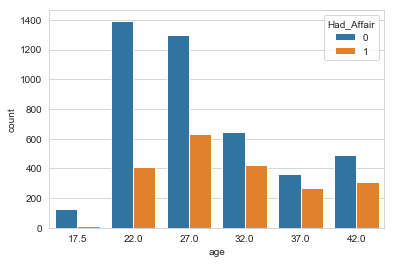

In [21]:
##dataframeに対するsortは廃止されているためsort_valuesで補完
sns.countplot("age",data=df.sort_values("age"),hue="Had_Affair")

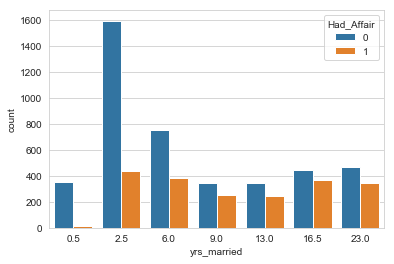

In [22]:
sns.countplot("yrs_married",data=df.sort_values("yrs_married"),hue="Had_Affair")

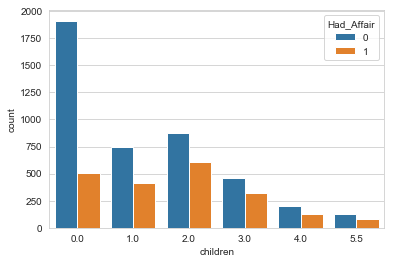

In [23]:
sns.countplot("children",data=df.sort_values("children"),hue="Had_Affair")

In [26]:
occ_dummies = pd.get_dummies(df.occupation)
hus_occ_dummies = pd.get_dummies(df.occupation_husb)
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [27]:
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [28]:
X = df.drop(["occupation","occupation_husb","Had_Affair"],axis=1)

In [29]:
dummies = pd.concat([occ_dummies,hus_occ_dummies],axis=1)

In [31]:
X = pd.concat([X,dummies],axis=1)

In [32]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [33]:
Y = df.Had_Affair

In [35]:
X = X.drop(["occ1","hocc1","affairs"],axis=1)

In [37]:
Y = np.ravel(Y)

In [38]:
log_model = LogisticRegression()
log_model.fit(X,Y)

/Users/shin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
log_model.score(X,Y)

0.7258875274897895

In [40]:
coeff_df = DataFrame([X.columns , log_model.coef_[0]]).T

,0,1
0,rate_marriage,-0.697846
1,age,-0.0563363
2,yrs_married,0.103893
3,children,0.0181853
4,religious,-0.368507
5,educ,0.00864737
6,occ2,0.298119
7,occ3,0.60815
8,occ4,0.346511
9,occ5,0.94226


In [48]:
#from sklearn.model_selection import train_test_splitを書いてやらないとエラーが出る
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [49]:
log_model2 = LogisticRegression()
log_model2.fit(X_train,Y_train)

/Users/shin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [50]:
class_predict = log_model2.predict(X_test)

In [51]:
metrics.accuracy_score(Y_test,class_predict)

0.7229899497487438